In [1]:
import pandas as pd
df = pd.read_csv('bank.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job         100 non-null    object
 1   marital     100 non-null    object
 2   education   100 non-null    object
 3   housing     100 non-null    object
 4   loan        100 non-null    object
 5   contact     100 non-null    object
 6   poutcome    100 non-null    object
 7   subscribed  100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


In [2]:
from sklearn import preprocessing

le_job = preprocessing.LabelEncoder()
le_job.fit(df['job']) 

le_marital = preprocessing.LabelEncoder()
le_marital.fit(df['marital']) 

le_education = preprocessing.LabelEncoder()
le_education.fit(df['education']) 

le_contact = preprocessing.LabelEncoder()
le_contact.fit(df['contact']) 

le_poutcome = preprocessing.LabelEncoder()
le_poutcome.fit(df['poutcome']) 

le_yes_no = preprocessing.LabelEncoder()
le_yes_no.fit(['yes','no']) 

df['job_num'] = le_job.transform(df['job']) 

df['marital_num'] = le_marital.transform(df['marital']) 

df['education_num'] = le_education.transform(df['education']) 

df['housing_num'] = le_yes_no.transform(df['housing']) 

df['loan_num'] = le_yes_no.transform(df['loan']) 

df['contact_num'] = le_contact.transform(df['contact']) 

df['poutcome_num'] = le_poutcome.transform(df['poutcome']) 

df['subscribed_num'] = le_yes_no.transform(df['subscribed']) 

df.to_csv('bank_encoded.csv')
df

,job,marital,education,housing,loan,contact,poutcome,subscribed,job_num,marital_num,education_num,housing_num,loan_num,contact_num,poutcome_num,subscribed_num
0,blue-collar,married,secondary,no,no,unknown,unknown,no,1,1,1,0,0,2,3,0
1,blue-collar,married,secondary,no,no,cellular,unknown,no,1,1,1,0,0,0,3,0
2,blue-collar,married,unknown,yes,no,unknown,unknown,no,1,1,3,1,0,2,3,0
3,self-employed,married,tertiary,no,no,cellular,unknown,no,6,1,2,0,0,0,3,0
4,technician,married,secondary,no,no,cellular,unknown,no,9,1,1,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,blue-collar,single,secondary,yes,no,cellular,unknown,yes,1,2,1,1,0,0,3,1
96,blue-collar,married,primary,yes,no,cellular,failure,no,1,1,0,1,0,0,0,0
97,admin.,married,secondary,yes,yes,cellular,unknown,no,0,1,1,1,1,0,3,0
98,blue-collar,divorced,primary,yes,no,cellular,unknown,no,1,0,0,1,0,0,3,0


In [3]:
dfcorrelations = df.corr(method='pearson')

print(dfcorrelations['subscribed_num'])

job_num           0.199343
marital_num       0.208831
education_num     0.111860
housing_num      -0.117185
loan_num         -0.141846
contact_num      -0.189402
poutcome_num     -0.258902
subscribed_num    1.000000
Name: subscribed_num, dtype: float64


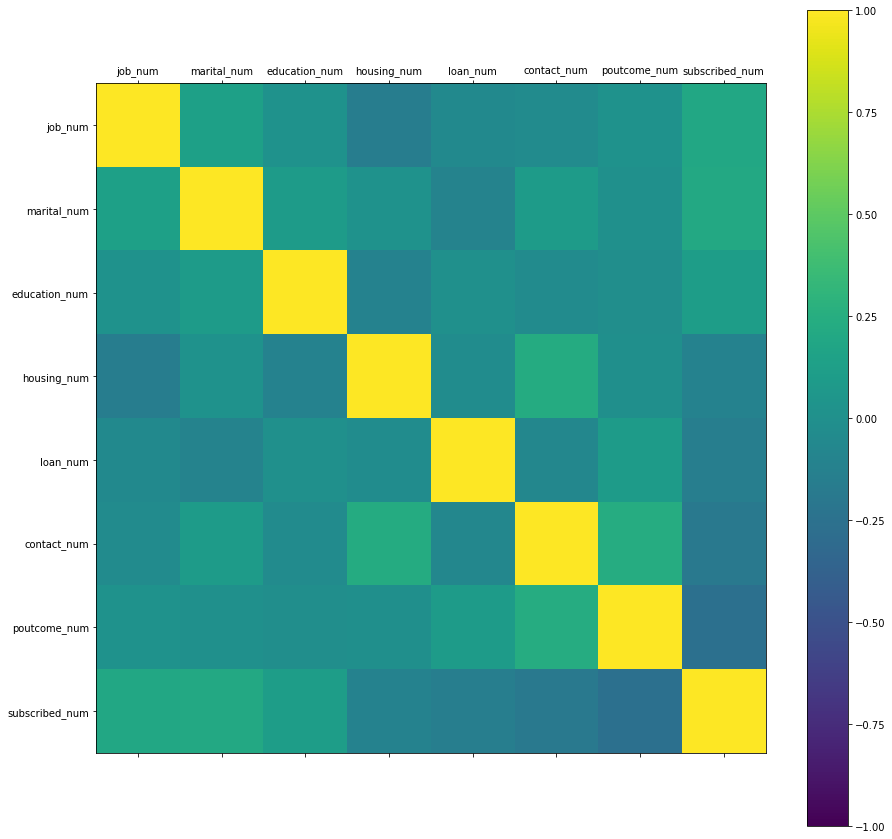

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,1,1)

cax = ax.matshow(dfcorrelations, vmin=-1, vmax=1)

fig.colorbar(cax)

ticks = [0,1,2,3,4,5,6,7]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num','subscribed_num'])
ax.set_yticklabels(['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num','subscribed_num'])
plt.show()

In [12]:
X = df[['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num']]

y = df['subscribed_num']

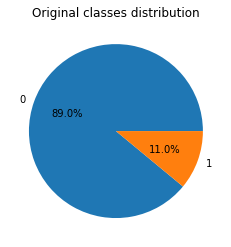

In [13]:
import matplotlib.pyplot as plt

count_values = y.value_counts()

labels = count_values.index.to_list()

plt.title('Original classes distribution')

plt.pie(x = count_values, labels = labels, autopct ='%1.1f%%' )

plt.show()

Before resampling:  100
After resampling:  178


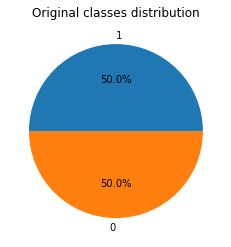

In [14]:
from sklearn.utils import resample

print("Before resampling: ", len(X))
 
df_0 = df[df['subscribed_num'] == 0]

df_1 = df[df['subscribed_num'] == 1]  

count_0 = df_0['subscribed_num'].count()

df_1_upsampled = resample(df_1, n_samples=count_0, replace=True)

df = pd.concat([df_1_upsampled,df_0])
 
X = df[['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num']]

y = df['subscribed_num']
print("After resampling: ", len(X))

count_values = y.value_counts()

labels = count_values.index.to_list()

plt.title('Original classes distribution')

plt.pie(x = count_values, labels = labels, autopct = '%1.1f%%' )

plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
# مصنف بايز الفئوي
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
# الملائمة
model.fit(X_train, y_train)
# التنبؤ على بيانات الاختبار
y_pred=model.predict(X_test)
# مقاييس الأداء
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# الصحة
print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_test, y_pred)))
# الدقة
print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_test, y_pred)))
# الاستذكار
print('\nRecall: {:.2f}\n'.format(100*recall_score(y_test, y_pred)))
# F1
print('\nF1: {:.2f}\n'.format(100*f1_score(y_test, y_pred)))


Accuracy: 73.33


Precision: 63.64


Recall: 77.78


F1: 70.00



[[19  8]
 [ 4 14]]


<AxesSubplot:>

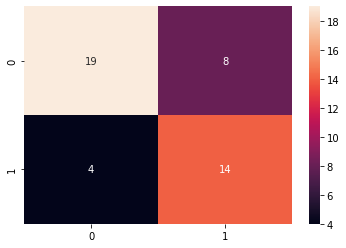

In [18]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [19]:
# مثال جديد
newExample = ['student','married','primary','no','yes','telephone','failure']
# الترميز الرقمي
# المهنة
job=le_job.transform([newExample[0]])[0]
# الوضع العائلي
marital=le_marital.transform([newExample[1]])[0]
# درجة التعليم
education=le_education.transform([newExample[2]])[0]
# قرض منزل
housing=le_yes_no.transform([newExample[3]])[0]
# قرض
loan=le_yes_no.transform([newExample[4]])[0]
# طريقة الاتصال
contact=le_contact.transform([newExample[5]])[0]
# نتيجة المحاولة السابقة
poutcome=le_poutcome.transform([newExample[6]])[0]

# المثال رقمي
newExample_num=[[job,marital,education,housing,loan,contact,poutcome]]

day_info = pd.DataFrame(newExample_num, columns=['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num'])

# التصنيف
predclass_num=model.predict(day_info)

# عكس التحويل للحصول على القيمة الفئوية
predclass=le_yes_no.inverse_transform(predclass_num)

print(predclass)

['yes']
